📌 Ý nghĩa các cột trong dữ liệu:

person_age: Tuổi của người vay
person_income: Tổng thu nhập hàng năm
person_emp_length: Số năm đi làm
loan_amnt: Số tiền vay
loan_int_rate: Lãi suất vay
loan_percent_income: Tỷ lệ phần trăm thu nhập dùng để trả nợ
cb_person_cred_hist_length: Lịch sử tín dụng (năm)
person_home_ownership: Tình trạng sở hữu nhà (RENT, OWN, MORTGAGE...)
loan_intent: Mục đích vay
loan_grade: Xếp hạng khoản vay (A-E)
cb_person_default_on_file: Từng vỡ nợ trong quá khứ (Y/N)
loan_status: Trạng thái vay (0 = Từ chối, 1 = Duyệt)


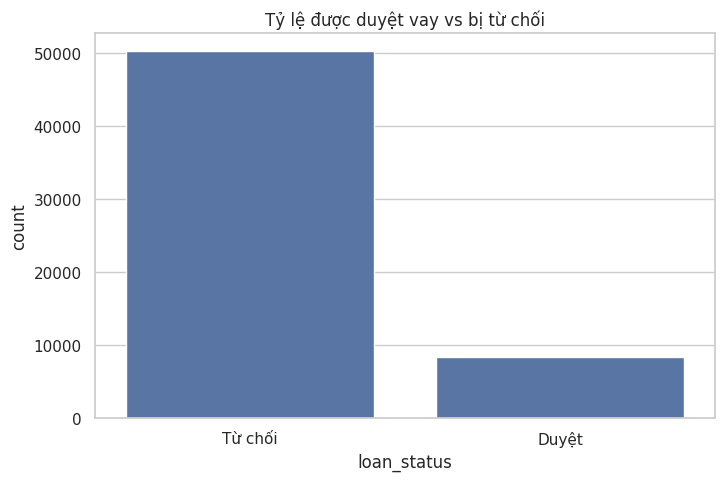

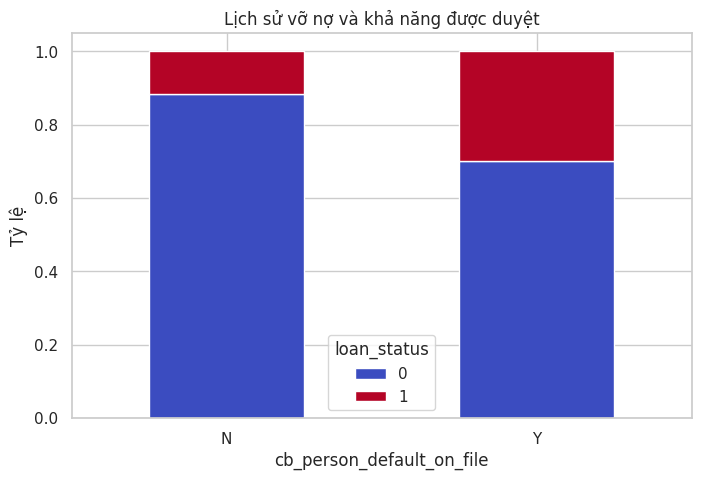

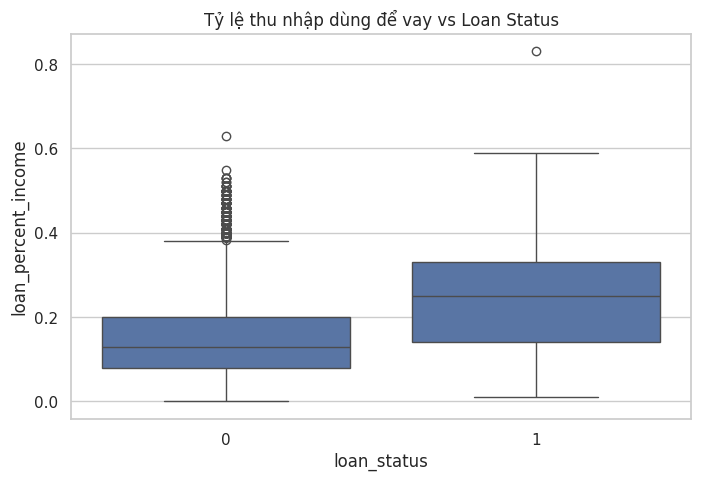

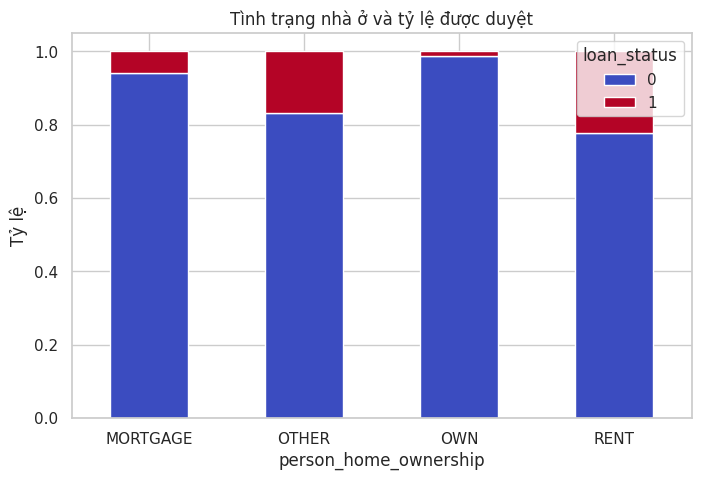

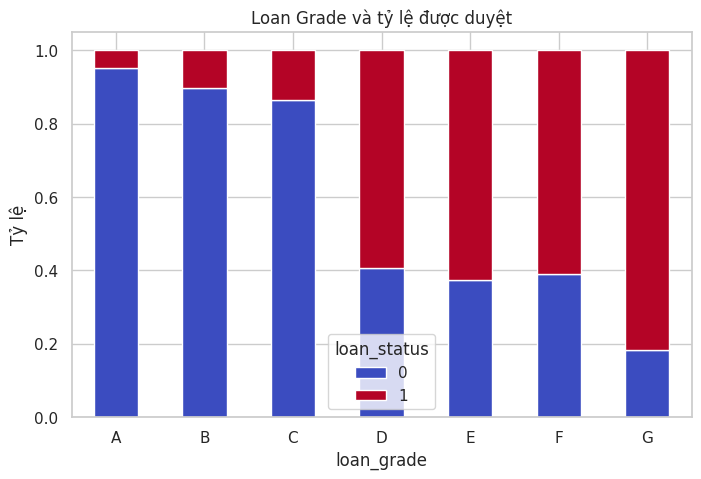

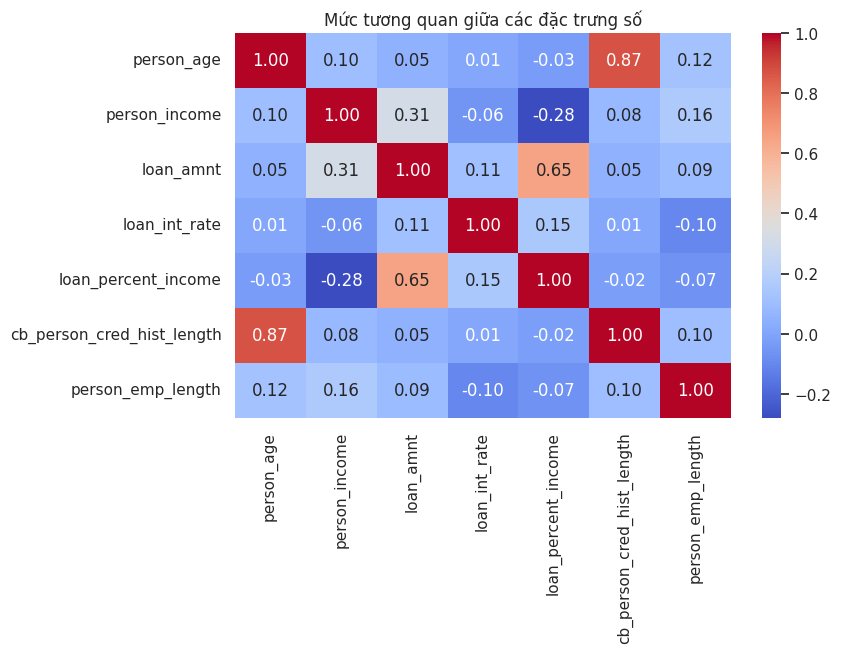

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Đọc dữ liệu ===
file_path = "/content/sample_data/train.csv"
df = pd.read_csv(file_path)

# === 2. Giải thích biến ===
feature_descriptions = {
    "person_age": "Tuổi của người vay",
    "person_income": "Tổng thu nhập hàng năm",
    "person_emp_length": "Số năm đi làm",
    "loan_amnt": "Số tiền vay",
    "loan_int_rate": "Lãi suất vay",
    "loan_percent_income": "Tỷ lệ phần trăm thu nhập dùng để trả nợ",
    "cb_person_cred_hist_length": "Lịch sử tín dụng (năm)",
    "person_home_ownership": "Tình trạng sở hữu nhà (RENT, OWN, MORTGAGE...)",
    "loan_intent": "Mục đích vay",
    "loan_grade": "Xếp hạng khoản vay (A-E)",
    "cb_person_default_on_file": "Từng vỡ nợ trong quá khứ (Y/N)",
    "loan_status": "Trạng thái vay (0 = Từ chối, 1 = Duyệt)"
}

print("📌 Ý nghĩa các cột trong dữ liệu:\n")
for col, desc in feature_descriptions.items():
    print(f"{col}: {desc}")

# === 3. EDA theo các mức ===
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# Biến số
num_cols = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate',
            'loan_percent_income', 'cb_person_cred_hist_length', 'person_emp_length']

# --- Đơn biến: loan_status ---
sns.countplot(data=df, x='loan_status')
plt.title('Tỷ lệ được duyệt vay vs bị từ chối')
plt.xticks([0,1], ['Từ chối', 'Duyệt'])
plt.show()

# --- Hai biến: Lịch sử vỡ nợ vs loan_status ---
ct1 = pd.crosstab(df['cb_person_default_on_file'], df['loan_status'], normalize='index')
ct1.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Lịch sử vỡ nợ và khả năng được duyệt')
plt.ylabel('Tỷ lệ')
plt.xticks(rotation=0)
plt.show()

# --- Hai biến: Tỷ lệ thu nhập dùng để vay vs loan_status ---
sns.boxplot(x='loan_status', y='loan_percent_income', data=df)
plt.title('Tỷ lệ thu nhập dùng để vay vs Loan Status')
plt.show()

# --- Hai biến: person_home_ownership vs loan_status ---
ct2 = pd.crosstab(df['person_home_ownership'], df['loan_status'], normalize='index')
ct2.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Tình trạng nhà ở và tỷ lệ được duyệt')
plt.ylabel('Tỷ lệ')
plt.xticks(rotation=0)
plt.show()

# --- Hai biến: loan_grade vs loan_status ---
ct3 = pd.crosstab(df['loan_grade'], df['loan_status'], normalize='index')
ct3.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Loan Grade và tỷ lệ được duyệt')
plt.ylabel('Tỷ lệ')
plt.xticks(rotation=0)
plt.show()

# --- Đa biến: Heatmap tương quan biến số ---
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mức tương quan giữa các đặc trưng số')
plt.show()
